In [24]:
import ToyData as td
import ID3
from graphviz import Source, render

import numpy as np
from sklearn import metrics, datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Scikit-learn Tree Classifier

### Load and split dataset

In [2]:
#Load dataset
digits = datasets.load_digits()

# 70% split between training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=0)

### Train data

In [3]:
# Tree classifier
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X_train, y_train)

### Visualize with graphviz

In [20]:
export_graphviz(model, out_file="tree.dot", class_names=[str(target) for target in digits.target_names],feature_names=digits.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
g = Source(dot_graph)
#g
# View PDF outside
g.view()


## Alternatively
# plt.figure(figsize=(25,5))
# tree.plot_tree(clf, max_depth=2)
# plt.show()

'Source.gv.pdf'

### Prediction and evaluation

In [14]:
y_pred = clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.88      0.87      0.87        52
           2       0.86      0.81      0.83        53
           3       0.80      0.83      0.82        54
           4       0.86      0.90      0.88        48
           5       0.94      0.89      0.92        57
           6       0.89      0.90      0.89        60
           7       0.92      0.92      0.92        53
           8       0.78      0.70      0.74        61
           9       0.77      0.84      0.81        57

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540


Confusion matrix:
[[42  0  0  0  0  0  1  0  0  2]
 [ 0 45  0  0  2  0  2  1  1  1]
 [ 1  0 43  3  1  0  0  0  2  3]
 [ 0  0  2 45  0  1  2  0  4  0]
 [ 1  0  0  0

## Changing parameters

In [33]:
tree2 = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10, random_state=0)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

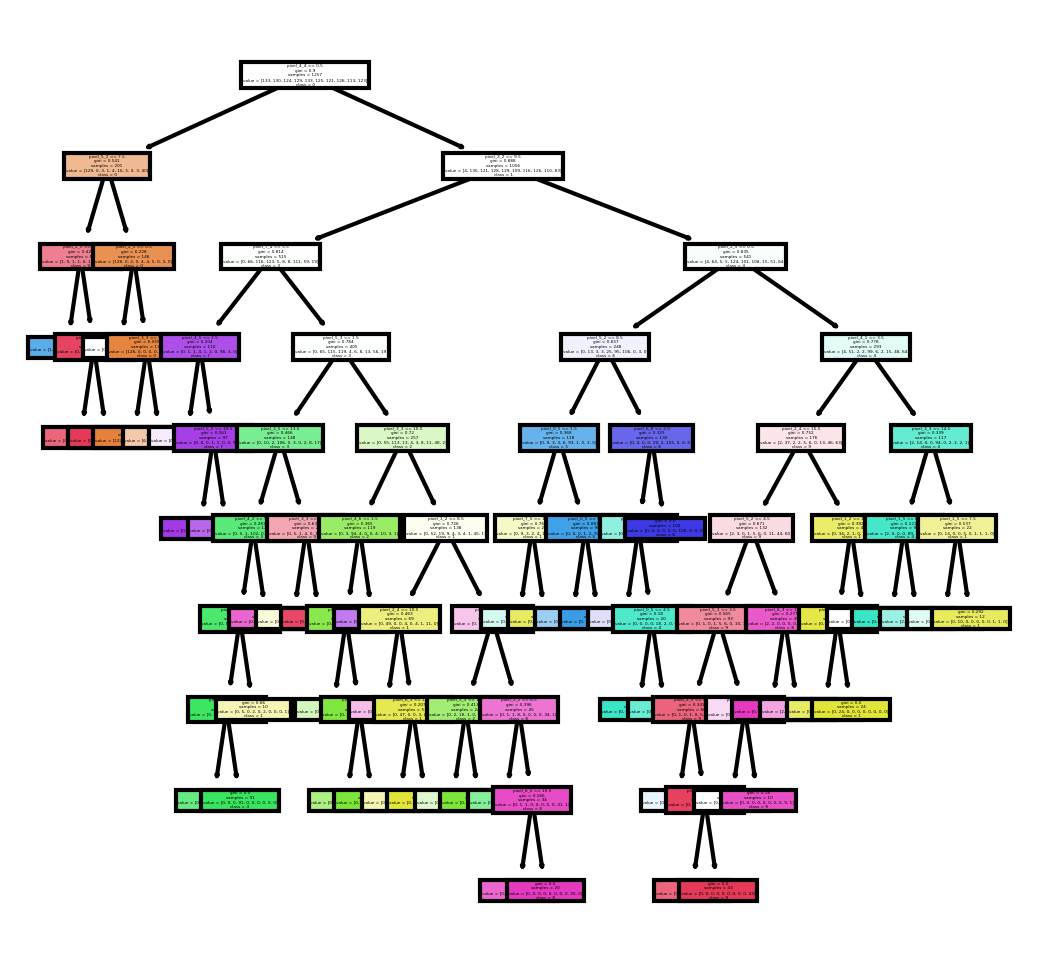

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(tree2,
               feature_names = digits.feature_names, 
               class_names=[str(target) for target in digits.target_names],
               filled = True);

In [35]:
export_graphviz(tree2,
                     out_file="tree2.dot",
                     feature_names = digits.feature_names, 
               class_names=[str(target) for target in digits.target_names],
                     filled = True)
#with open("tree2.dot") as f:
#    dot_graph = f.read()
#g2 = Source(dot_graph)
#g
# View PDF outside
#g2.render()

with open("tree2.dot") as f:
    dot_graph = f.read()

render('dot', 'png', 'tree2.dot')  

'tree2.dot.png'

In [36]:
y_pred2 = tree2.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (tree2, metrics.classification_report(y_test, y_pred2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred2))

Classification report for classifier DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.67      0.75      0.71        52
           2       0.83      0.81      0.82        53
           3       0.91      0.80      0.85        54
           4       0.67      0.90      0.77        48
           5       0.90      0.82      0.86        57
           6       0.94      0.83      0.88        60
           7       0.80      0.75      0.78        53
           8       0.71      0.79      0.74        61
           9       0.89      0.82      0.85        57

    accuracy                           0.82       540
   macro avg       0.83      0.82      0.82       540
weighted avg       0.83      0.82      0.82       540


Confusion matrix:
[[41  0  0  0  1  1  0  0  0  2]
 [ 0 39  1  1  2  0  3  1  4  1]
 [ 1  5 43  1